In [1]:
import numpy as np
import matplotlib.pyplot as plt

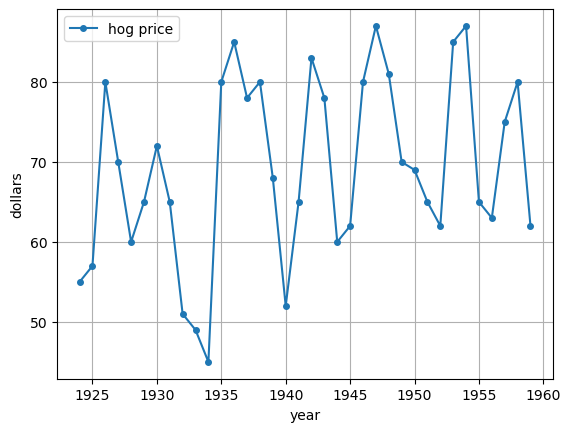

In [2]:
hog_prices = [55, 57, 80, 70, 60, 65, 72, 65, 51, 49, 45, 80, 85,
              78, 80, 68, 52, 65, 83, 78, 60, 62, 80, 87, 81, 70,
              69, 65, 62, 85, 87, 65, 63, 75, 80, 62]
years = np.arange(1924, 1960)
fig, ax = plt.subplots()
ax.plot(years, hog_prices, '-o', ms=4, label='hog price')
ax.set_xlabel('year')
ax.set_ylabel('dollars')
ax.legend()
ax.grid()
plt.show()

In [3]:
class Market:

    def __init__(self,
                 a=8,      # demand parameter
                 b=1,      # demand parameter
                 c=6,      # supply parameter
                 d=1,      # supply parameter
                 λ=2.0):   # supply parameter
        self.a, self.b, self.c, self.d = a, b, c, d
        self.λ = λ

    def demand(self, p):
        a, b = self.a, self.b
        return a - b * p

    def supply(self, p):
        c, d, λ = self.c, self.d, self.λ
        return np.tanh(λ * (p - c)) + d

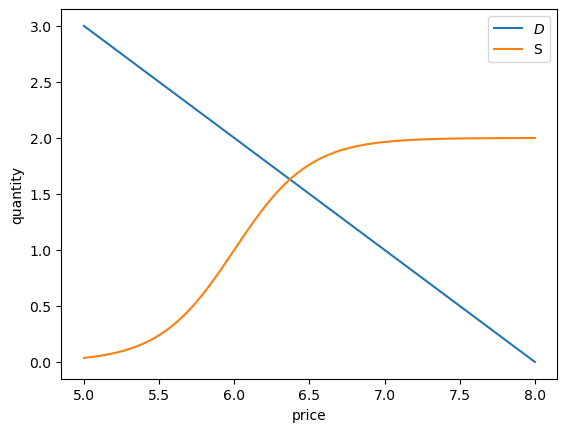

In [4]:
p_grid = np.linspace(5, 8, 200)
m = Market()
fig, ax = plt.subplots()

ax.plot(p_grid, m.demand(p_grid), label="$D$")
ax.plot(p_grid, m.supply(p_grid), label="S")
ax.set_xlabel("price")
ax.set_ylabel("quantity")
ax.legend()

plt.show()

In [5]:
def g(model, current_price):
    """
    Function to find the next price given the current price
    and Market model
    """
    a, b = model.a, model.b
    next_price = - (model.supply(current_price) - a) / b
    return next_price

In [6]:
def plot45(model, pmin, pmax, p0, num_arrows=5):
    """
    Function to plot a 45 degree plot

    Parameters
    ==========

    model: Market model

    pmin: Lower price limit

    pmax: Upper price limit

    p0: Initial value of price (needed to simulate prices)

    num_arrows: Number of simulations to plot
    """
    pgrid = np.linspace(pmin, pmax, 200)

    fig, ax = plt.subplots()
    ax.set_xlim(pmin, pmax)
    ax.set_ylim(pmin, pmax)

    hw = (pmax - pmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k", ec="k", head_width=hw,
            length_includes_head=True, lw=1,
            alpha=0.6, head_length=hl)

    ax.plot(pgrid, g(model, pgrid), 'b-',
            lw=2, alpha=0.6, label='g')
    ax.plot(pgrid, pgrid, lw=1, alpha=0.7, label='45')

    x = p0
    xticks = [pmin]
    xtick_labels = [pmin]

    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(model, x),
                     **arrow_args)
        else:
            ax.arrow(x, x, 0.0, g(model, x) - x,
                     **arrow_args)
            ax.plot((x, x), (0, x), ls='dotted')

        ax.arrow(x, g(model, x),
                 g(model, x) - x, 0, **arrow_args)
        xticks.append(x)
        xtick_labels.append(r'$p_{}$'.format(str(i)))

        x = g(model, x)
        xticks.append(x)
        xtick_labels.append(r'$p_{}$'.format(str(i+1)))
        ax.plot((x, x), (0, x), '->', alpha=0.5, color='orange')

    xticks.append(pmax)
    xtick_labels.append(pmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)

    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args, fontsize=14)
    plt.show()

In [7]:
m = Market()

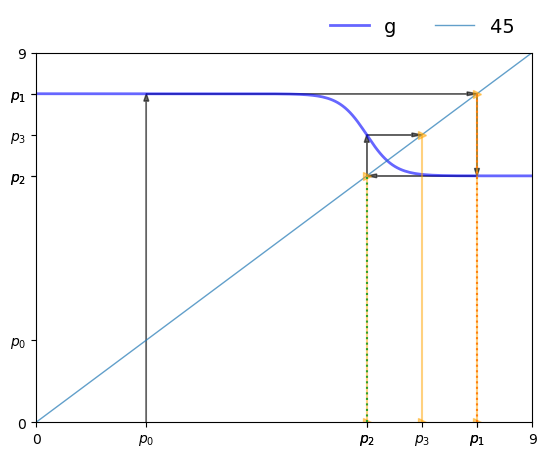

In [8]:
plot45(m, 0, 9, 2, num_arrows=3)

In [9]:
def ts_plot_price(model,             # Market model
                  p0,                # Initial price
                  y_a=3, y_b= 12,    # Controls y-axis
                  ts_length=10):     # Length of time series
    """
    Function to simulate and plot the time series of price.

    """
    fig, ax = plt.subplots()
    ax.set_xlabel(r'$t$', fontsize=12)
    ax.set_ylabel(r'$p_t$', fontsize=12)
    p = np.empty(ts_length)
    p[0] = p0
    for t in range(1, ts_length):
        p[t] = g(model, p[t-1])
    ax.plot(np.arange(ts_length),
            p,
            'bo-',
            alpha=0.6,
            lw=2,
            label=r'$p_t$')
    ax.legend(loc='best', fontsize=10)
    ax.set_ylim(y_a, y_b)
    ax.set_xticks(np.arange(ts_length))
    plt.show()

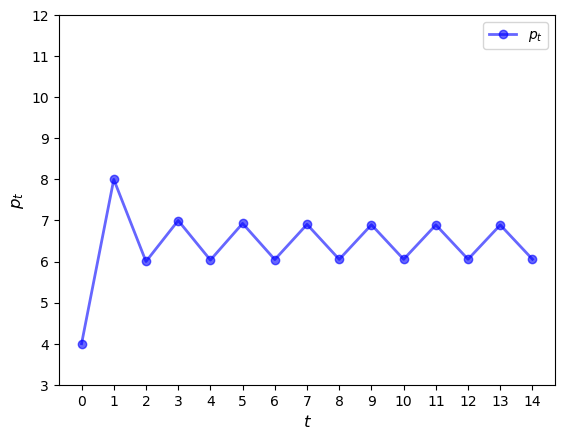

In [10]:
ts_plot_price(m, 4, ts_length=15)

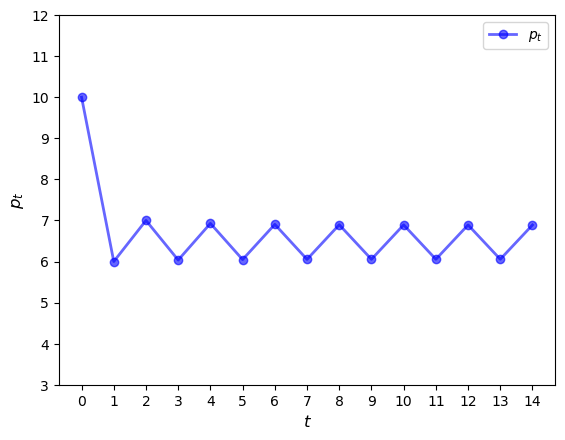

In [11]:
ts_plot_price(m, 10, ts_length=15)

In [12]:
def find_next_price_adaptive(model, curr_price_exp):
    """
    Function to find the next price given the current price expectation
    and Market model
    """
    return - (model.supply(curr_price_exp) - model.a) / model.b

In [13]:
def ts_price_plot_adaptive(model, p0, ts_length=10, α=[1.0, 0.9, 0.75]):
    fig, axs = plt.subplots(1, len(α), figsize=(12, 5))
    for i_plot, a in enumerate(α):
        pe_last = p0
        p_values = np.empty(ts_length)
        p_values[0] = p0
        for i in range(1, ts_length):
            p_values[i] = find_next_price_adaptive(model, pe_last)
            pe_last = a*p_values[i] + (1 - a)*pe_last

        axs[i_plot].plot(np.arange(ts_length), p_values)
        axs[i_plot].set_title(r'$\alpha={}$'.format(a))
        axs[i_plot].set_xlabel('t')
        axs[i_plot].set_ylabel('price')
    plt.show()

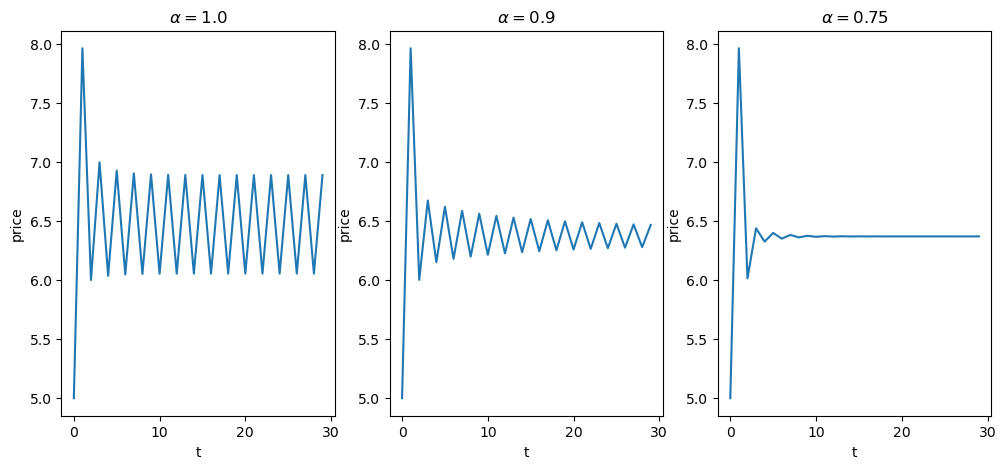

In [14]:
ts_price_plot_adaptive(m, 5, ts_length=30)

In [15]:
def ts_plot_supply(model, p0, ts_length=10):
    """
    Function to simulate and plot the supply function
    given the initial price.
    """
    pe_last = p0
    s_values = np.empty(ts_length)
    for i in range(ts_length):
        # store quantity
        s_values[i] = model.supply(pe_last)
        # update price
        pe_last = - (s_values[i] - model.a) / model.b


    fig, ax = plt.subplots()
    ax.plot(np.arange(ts_length),
            s_values,
            'bo-',
            alpha=0.6,
            lw=2,
            label=r'supply')

    ax.legend(loc='best', fontsize=10)
    ax.set_xticks(np.arange(ts_length))
    ax.set_xlabel("time")
    ax.set_ylabel("quantity")
    plt.show()

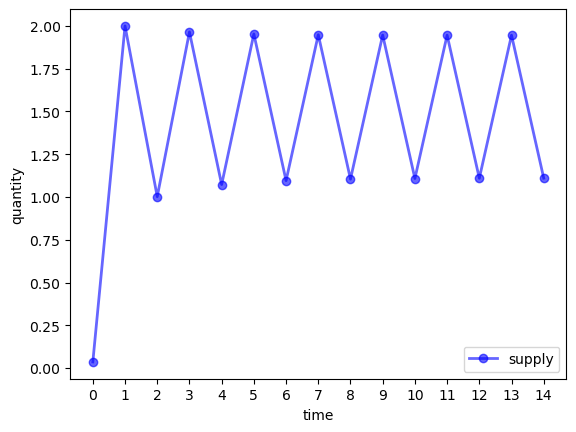

In [16]:
m = Market()
ts_plot_supply(m, 5, 15)

In [17]:
def find_next_price_blae(model, curr_price_exp):
    """
    Function to find the next price given the current price expectation
    and Market model
    """
    return - (model.supply(curr_price_exp) - model.a) / model.b

In [18]:
def ts_plot_price_blae(model, p0, p1, alphas, ts_length=15):
    """
    Function to simulate and plot the time series of price
    using backward looking average expectations.
    """
    fig, axes = plt.subplots(len(alphas), 1, figsize=(8, 16))

    for ax, a in zip(axes.flatten(), alphas):
        p = np.empty(ts_length)
        p[0] = p0
        p[1] = p1
        for t in range(2, ts_length):
            pe = a*p[t-1] + (1 - a)*p[t-2]
            p[t] = -(model.supply(pe) - model.a) / model.b
        ax.plot(np.arange(ts_length),
                p,
                'o-',
                alpha=0.6,
                label=r'$\alpha={}$'.format(a))
        ax.legend(loc='best', fontsize=10)
        ax.set_xlabel(r'$t$', fontsize=12)
        ax.set_ylabel(r'$p_t$', fontsize=12)
    plt.show()

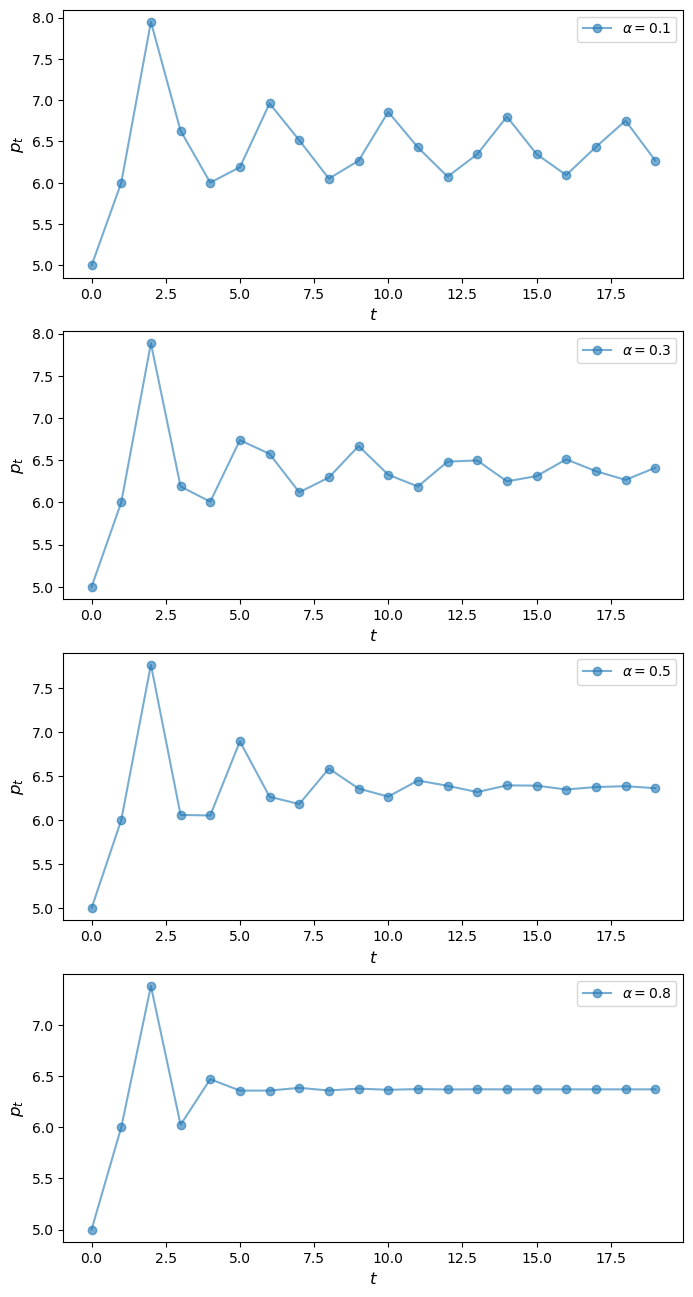

In [19]:
m = Market()
ts_plot_price_blae(m, 
                   p0=5, 
                   p1=6, 
                   alphas=[0.1, 0.3, 0.5, 0.8], 
                   ts_length=20)